<a href="https://colab.research.google.com/github/Anusarakh/DPDM2021/blob/main/Project_Final_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd

In [31]:
from google.colab import drive # เชื่อม google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import os

# ทำการ Visualization ปริมาณคนตาย จากไวรัสโควิด 19 ในเกาหลีใต้

In [33]:
path = '/content/drive/My Drive/DPDM2021_DATA/Project/Covid-19_in_SouthKorea' # เรียกข้อมูลจาก Drive 
Patient = pd.read_csv(os.path.join(path,'PatientInfo.csv')) # ชื่อไฟล์ข้อมูล PatientInfo.csv
Patient  # เรียกดูตาราง

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


## ตรวจสอบค่า mising จากตาราง PatientInfo

In [34]:
Patient.isnull().any()

patient_id            False
sex                    True
age                    True
country               False
province              False
city                   True
infection_case         True
infected_by            True
contact_number         True
symptom_onset_date     True
confirmed_date         True
released_date          True
deceased_date          True
state                 False
dtype: bool

## แทนค่า missing ในตัวแปรที่สนใจ

In [35]:
Patient[['sex']].dropna().mode().iloc[0,0] # แทนค่า missing ด้วยค่า mode

'female'

In [36]:
Patient[['sex']] = Patient[['sex']].fillna(Patient[['sex']].dropna().mode().iloc[0,0])  # แทนค่า missing ด้วยค่า mod  เนื่องจากข้อมูลเชิงคุณภาพ

In [37]:
Patient[['age']].dropna().mode().iloc[0,0]

'20s'

In [38]:
Patient[['age']] = Patient[['age']].fillna(Patient[['age']].dropna().mode().iloc[0,0])  # แทนค่า missing ด้วยค่า mod  เนื่องจากข้อมูลเชิงคุณภาพ

In [39]:
Patient[['city']].dropna().mode().iloc[0,0]

'Gyeongsan-si'

In [40]:
Patient[['city']] = Patient[['city']].fillna(Patient[['city']].dropna().mode().iloc[0,0])  # แทนค่า missing ด้วยค่า mod  เนื่องจากข้อมูลเชิงคุณภาพ

In [41]:
Patient[['infection_case']].dropna().mode().iloc[0,0]

'contact with patient'

In [42]:
Patient[['infection_case']] = Patient[['infection_case']].fillna(Patient[['infection_case']].dropna().mode().iloc[0,0])  # แทนค่า missing ด้วยค่า mod  เนื่องจากข้อมูลเชิงคุณภาพ

In [43]:
Patient


,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,female,20s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,female,20s,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,female,20s,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [44]:
Patient.isnull().any()

patient_id            False
sex                   False
age                   False
country               False
province              False
city                  False
infection_case        False
infected_by            True
contact_number         True
symptom_onset_date     True
confirmed_date         True
released_date          True
deceased_date          True
state                 False
dtype: bool

## ตรวจสอบจำนวนข้อมูล

In [45]:
Patient.shape

(5165, 14)

## Vizualization  จำนวนผูเสียชีวิตของผู้ติดเชื้อโควิด 19 ในประเทศเกาหลีใต้ จำแนกดังนี้
1.กลุ่มอายุ

2.เพศ

3.สาเหตุหารติดเชื้อ

4.เมือง

## ทำการเลือกคอลัมล์ที่สนใจ มาทำการ Vizualization

In [46]:
Patient_data = Patient[['patient_id','sex','age','city','infection_case','deceased_date']] # ชี้ตาราง เพื่อเลือกข้อมูลที่สนใจ
Patient_data # ตารางที่ยังไม่แทนค่า 0 และ 1 ใน จำนวนผู้เสียชีวต (คอลัมล์ deceased_date)

,patient_id,sex,age,city,infection_case,deceased_date
0,1000000001,male,50s,Gangseo-gu,overseas inflow,NaN
1,1000000002,male,30s,Jungnang-gu,overseas inflow,NaN
2,1000000003,male,50s,Jongno-gu,contact with patient,NaN
3,1000000004,male,20s,Mapo-gu,overseas inflow,NaN
4,1000000005,female,20s,Seongbuk-gu,contact with patient,NaN
...,...,...,...,...,...,...
5160,7000000015,female,30s,Jeju-do,overseas inflow,NaN
5161,7000000016,female,20s,Jeju-do,overseas inflow,NaN
5162,7000000017,female,20s,Jeju-do,overseas inflow,NaN
5163,7000000018,female,20s,Jeju-do,overseas inflow,NaN


## แทนความหมาย การเสียชีวิตและไม่เสียชีวิต ใน คอลัมล์ deceased_date
0 = ไม่เสียชีวิต แทนใน NaN

1 = เสียชีวิต แทนในค่า date หรือ row ที่แสดงวันที่

In [47]:
Patient_data['deceased_date'] = Patient_data['deceased_date'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
Patient_data

,patient_id,sex,age,city,infection_case,deceased_date
0,1000000001,male,50s,Gangseo-gu,overseas inflow,0
1,1000000002,male,30s,Jungnang-gu,overseas inflow,0
2,1000000003,male,50s,Jongno-gu,contact with patient,0
3,1000000004,male,20s,Mapo-gu,overseas inflow,0
4,1000000005,female,20s,Seongbuk-gu,contact with patient,0
...,...,...,...,...,...,...
5160,7000000015,female,30s,Jeju-do,overseas inflow,0
5161,7000000016,female,20s,Jeju-do,overseas inflow,0
5162,7000000017,female,20s,Jeju-do,overseas inflow,0
5163,7000000018,female,20s,Jeju-do,overseas inflow,0


In [49]:
set(Patient_data['deceased_date'])

{0,
 '2020-02-19',
 '2020-02-21',
 '2020-02-23',
 '2020-02-24',
 '2020-02-25',
 '2020-02-26',
 '2020-02-27',
 '2020-03-01',
 '2020-03-02',
 '2020-03-03',
 '2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-07',
 '2020-03-08',
 '2020-03-09',
 '2020-03-11',
 '2020-03-16',
 '2020-03-18',
 '2020-03-20',
 '2020-03-22',
 '2020-03-24',
 '2020-03-25',
 '2020-03-26',
 '2020-03-27',
 '2020-03-29',
 '2020-03-31',
 '2020-04-02',
 '2020-04-03',
 '2020-04-05',
 '2020-04-06',
 '2020-04-08',
 '2020-04-09',
 '2020-04-11',
 '2020-04-18',
 '2020-04-22',
 '2020-05-02',
 '2020-05-11',
 '2020-05-25'}

In [50]:
dw_mapping={'2020-02-19':1, '2020-02-21':1, '2020-02-23':1, '2020-02-24':1, '2020-02-25':1, '2020-02-26':1, '2020-02-27':1, '2020-03-01':1, '2020-03-02':1
            ,'2020-03-03':1, '2020-03-04':1,'2020-03-05':1,'2020-03-06':1,'2020-03-07':1,'2020-03-08':1,'2020-03-09':1,'2020-03-11':1
            ,'2020-03-16':1,'2020-03-18':1,'2020-03-20':1,'2020-03-22':1,'2020-03-24':1,'2020-03-25':1,'2020-03-26':1,'2020-03-27':1,'2020-03-29':1
            ,'2020-03-31':1,'2020-04-02':1,'2020-04-03':1,'2020-04-05':1,'2020-04-06':1,'2020-04-08':1,'2020-04-09':1,'2020-04-11':1,'2020-04-18':1,'2020-04-22':1
            ,'2020-05-02':1,'2020-05-11':1,'2020-05-25':1}
Patient_data['deceased_date']=Patient_data['deceased_date'].map(dw_mapping)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
Patient_data

,patient_id,sex,age,city,infection_case,deceased_date
0,1000000001,male,50s,Gangseo-gu,overseas inflow,NaN
1,1000000002,male,30s,Jungnang-gu,overseas inflow,NaN
2,1000000003,male,50s,Jongno-gu,contact with patient,NaN
3,1000000004,male,20s,Mapo-gu,overseas inflow,NaN
4,1000000005,female,20s,Seongbuk-gu,contact with patient,NaN
...,...,...,...,...,...,...
5160,7000000015,female,30s,Jeju-do,overseas inflow,NaN
5161,7000000016,female,20s,Jeju-do,overseas inflow,NaN
5162,7000000017,female,20s,Jeju-do,overseas inflow,NaN
5163,7000000018,female,20s,Jeju-do,overseas inflow,NaN


In [52]:
Patient_data['deceased_date'] = Patient_data['deceased_date'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
Patient_data_ = Patient_data
Patient_data_

,patient_id,sex,age,city,infection_case,deceased_date
0,1000000001,male,50s,Gangseo-gu,overseas inflow,0.0
1,1000000002,male,30s,Jungnang-gu,overseas inflow,0.0
2,1000000003,male,50s,Jongno-gu,contact with patient,0.0
3,1000000004,male,20s,Mapo-gu,overseas inflow,0.0
4,1000000005,female,20s,Seongbuk-gu,contact with patient,0.0
...,...,...,...,...,...,...
5160,7000000015,female,30s,Jeju-do,overseas inflow,0.0
5161,7000000016,female,20s,Jeju-do,overseas inflow,0.0
5162,7000000017,female,20s,Jeju-do,overseas inflow,0.0
5163,7000000018,female,20s,Jeju-do,overseas inflow,0.0


In [59]:
set(Patient_data_['deceased_date'])

{0.0, 1.0}

In [65]:
dw_mapping={'male':0, 'female':1}
Patient_data_['sex']=Patient_data_['sex'].map(dw_mapping)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
Patient_data_

,patient_id,sex,age,city,infection_case,deceased_date
0,1000000001,0,50s,Gangseo-gu,overseas inflow,0.0
1,1000000002,0,30s,Jungnang-gu,overseas inflow,0.0
2,1000000003,0,50s,Jongno-gu,contact with patient,0.0
3,1000000004,0,20s,Mapo-gu,overseas inflow,0.0
4,1000000005,1,20s,Seongbuk-gu,contact with patient,0.0
...,...,...,...,...,...,...
5160,7000000015,1,30s,Jeju-do,overseas inflow,0.0
5161,7000000016,1,20s,Jeju-do,overseas inflow,0.0
5162,7000000017,1,20s,Jeju-do,overseas inflow,0.0
5163,7000000018,1,20s,Jeju-do,overseas inflow,0.0


### แทนตัวเลขในกลุ่มอายุ 

0sคือ 0-9 ปี แทนด้วย 0

10s คือ 10-19 ปี แทนด้วย 1 

20s  คือ 20-29 ปี แทนด้วย 2

30s คือ 30-39 ปี แทนด้วย 3

40s คือ 40-49 ปี แทนด้วย 4

50s คือ 50-59 ปี แทนด้วย 5

60s คือ 60-69 ปี แทนด้วย 6

70s คือ 70-79 ปี แทนด้วย 7

80s คือ 80-89 ปี แทนด้วย 8 

90s คือ 90-99 ปี แทนด้วย 9

100s คือ 100ปีขึ้นไป แทนด้วย 10

In [67]:
set(Patient_data_['age'])

{'0s', '100s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s'}

In [69]:
dw_mapping={'0s':0, '100s':10, '10s':1, '20s':2, '30s':3, '40s':4, '50s':5, '60s':6, '70s':7, '80s':8, '90s':9}
Patient_data_['age']=Patient_data_['age'].map(dw_mapping)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [70]:
Patient_data_

,patient_id,sex,age,city,infection_case,deceased_date
0,1000000001,0,5,Gangseo-gu,overseas inflow,0.0
1,1000000002,0,3,Jungnang-gu,overseas inflow,0.0
2,1000000003,0,5,Jongno-gu,contact with patient,0.0
3,1000000004,0,2,Mapo-gu,overseas inflow,0.0
4,1000000005,1,2,Seongbuk-gu,contact with patient,0.0
...,...,...,...,...,...,...
5160,7000000015,1,3,Jeju-do,overseas inflow,0.0
5161,7000000016,1,2,Jeju-do,overseas inflow,0.0
5162,7000000017,1,2,Jeju-do,overseas inflow,0.0
5163,7000000018,1,2,Jeju-do,overseas inflow,0.0


## จำนวนการเสียชีวีดและไม่เสียชีวิตของผู้ติดเชื้อ
0 = ไม่เสียชีวิต จำนวน 5099 ราย

1 = เสียชีวิต จำนวน 66 ราย

In [71]:
Patient_data_Total = Patient_data_.groupby('deceased_date').count()
Patient_data_Total

,patient_id,sex,age,city,infection_case
deceased_date,,,,,
0.0,5099,5099,5099,5099,5099
1.0,66,66,66,66,66


## เลือกผู้ที่เสียชีวิดจาก colum deceased_date = 1.0

In [72]:
deceased = Patient_data_[Patient_data_['deceased_date']==1.0] #เลือกเฉพาะผู้ติดเชื้อโควิด ที่เสียชีวิต
deceased

,patient_id,sex,age,city,infection_case,deceased_date
1468,1200000038,1,5,Nam-gu,contact with patient,1.0
1507,1200000114,0,7,Gyeongsan-si,Shincheonji Church,1.0
1508,1200000620,0,7,Gyeongsan-si,contact with patient,1.0
1509,1200000901,1,8,Gyeongsan-si,contact with patient,1.0
1510,1200001064,1,7,Gyeongsan-si,contact with patient,1.0
...,...,...,...,...,...,...
4902,6020100104,0,6,Cheongdo-gun,Cheongdo Daenam Hospital,1.0
4903,6020100107,0,6,Cheongdo-gun,Cheongdo Daenam Hospital,1.0
4904,6020100205,1,5,Cheongdo-gun,Cheongdo Daenam Hospital,1.0
4905,6020100286,0,6,Cheongdo-gun,Cheongdo Daenam Hospital,1.0


## จำนวนผู้ที่เสียชีวิต¶

In [73]:
deceased.shape

(66, 6)

## จำนวนผู้เสียชีวิต จำแนกตามอายุของผู้ติดเชื้อโควิด

In [74]:

deceased_age = deceased.groupby('age').count().sort_values(by=['deceased_date'],ascending=False).reset_index() # groupby กลุ่มอายุ
deceased_age = deceased_age[['age','deceased_date']]
deceased_age

,age,deceased_date
0,8,22
1,7,19
2,6,11
3,5,7
4,9,6
5,3,1


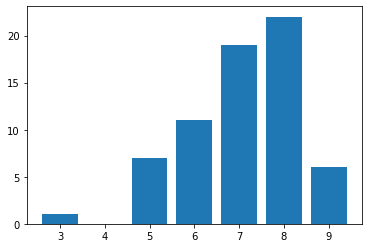

In [75]:
import numpy as np
import matplotlib.pyplot as plt

age = np.array(deceased_age['age'])
deceased_date = np.array(deceased_age['deceased_date'])

plt.bar(age,deceased_date)
plt.show()

## กลุ่มอายุที่มีผู้เสียชีวิตมากที่สุด คือ 80-89 ปี  รองลงมา คือ 70-79 ปี

## จำนวนผู้เสียชีวิต จำแนกตามเพศของผู้ติดเชื้อโควิด

In [76]:
deceased_sex = deceased.groupby('sex').count().sort_values(by=['deceased_date'],ascending=False).reset_index() # groupby กลุ่มอายุ
deceased_sex = deceased_sex[['sex','deceased_date']]
deceased_sex

,sex,deceased_date
0,0,40
1,1,26


 0 = ชาย  1 = หญิง

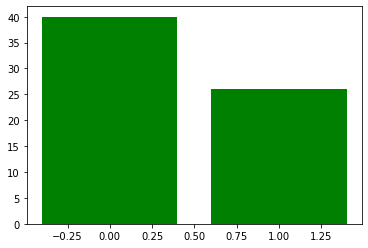

In [77]:
import numpy as np
import matplotlib.pyplot as plt

sex = np.array(deceased_sex['sex'])
deceased_date = np.array(deceased_sex['deceased_date'])

plt.bar(sex,deceased_date , color='green')
plt.show()

ผู้ชายที่ติดเชื้อมีจำนวนผู้เสียชีวิตมากกว่า ผู้หญิงที่ติดเชื้อ

## จำนวนผู้เสียชีวิต จำแนกตามสาเหตุการติดเชื้อ

In [78]:
deceased_Infec = deceased.groupby('infection_case').count().sort_values(by=['deceased_date'],ascending=False).reset_index() 
deceased_Infec = deceased_Infec[['infection_case','deceased_date']]
deceased_Infec

,infection_case,deceased_date
0,contact with patient,43
1,etc,12
2,Cheongdo Daenam Hospital,7
3,Shincheonji Church,2
4,Bonghwa Pureun Nursing Home,1
5,Gyeongsan Jeil Silver Town,1


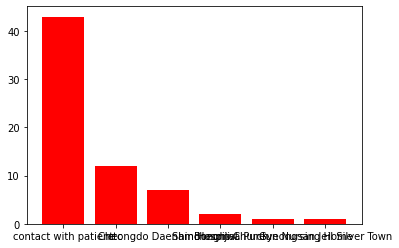

In [79]:

infection = np.array(deceased_Infec['infection_case'])
deceased_date = np.array(deceased_Infec['deceased_date'])

plt.bar(infection,deceased_date , color='red')
plt.show()

ส่วนใหญ่จะมีสาเหตุของงการติดเชื้อ มาจาก ใกล้ชิดหรือสัมผัสกับผู้ติดเชื้อ

## จำนวนผู้เสียชีวิต จำแนกตามเมืองของผู้ติดเชื้อโควิด

In [80]:
deceased_city = deceased.groupby('city').count().sort_values(by=['deceased_date'],ascending=False).reset_index() 
deceased_city = deceased_city[['city','deceased_date']]
deceased_city

,city,deceased_date
0,Gyeongsan-si,47
1,Cheongdo-gun,7
2,Cheorwon-gun,2
3,Nam-gu,2
4,Yeongcheon-si,2
5,Bonghwa-gun,1
6,Namyangju-si,1
7,Seo-gu,1
8,Seongju-gun,1
9,Taebaek-si,1


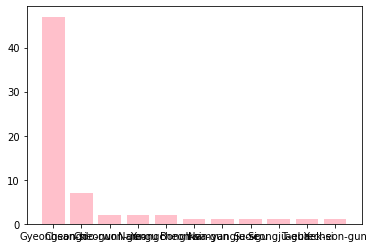

In [81]:

city = np.array(deceased_city['city'])
deceased_date = np.array(deceased_city['deceased_date'])

plt.bar(city,deceased_date , color='pink')
plt.show()

# เชื่อมตารางcode 

In [82]:
path = '/content/drive/My Drive/DPDM2021_DATA/Project' # เรียกข้อมูลจาก Drive 
city_id = pd.read_csv(os.path.join(path,'city_id.csv')) 
city_id

,city,city_id
0,Andong-si,1
1,Ansan-si,2
2,Anseong-si,3
3,Anyang-si,4
4,Asan-si,5
...,...,...
158,Yongin-si,159
159,Yongsan-gu,160
160,Yuseong-gu,161
161,etc,162


In [86]:
path = '/content/drive/My Drive/DPDM2021_DATA/Project' # เรียกข้อมูลจาก Drive 
infection_case_id = pd.read_csv(os.path.join(path,'infection_case_id.csv')) 
infection_case_id = infection_case_id[['infection_case','infection_case_id']]
infection_case_id

,infection_case,infection_case_id
0,Anyang Gunpo Pastors Group,1
1,Biblical Language study meeting,2
2,Bonghwa Pureun Nursing Home,3
3,Changnyeong Coin Karaoke,4
4,Cheongdo Daenam Hospital,5
5,Coupang Logistics Center,6
6,Daejeon door-to-door sales,7
7,Daezayeon Korea,8
8,Day Care Center,9
9,Dongan Church,10


In [87]:
Patient_Casedata = pd.merge(Patient_data_,city_id,on='infection_case')# เชื่อมตาราง  ด้วย .merge 
Patient_Casedata

,patient_id,sex,age,city,infection_case,deceased_date,infection_case_id
0,1000000001,0,5,Gangseo-gu,overseas inflow,0.0,51
1,1000000002,0,3,Jungnang-gu,overseas inflow,0.0,51
2,1000000004,0,2,Mapo-gu,overseas inflow,0.0,51
3,1000000008,0,2,etc,overseas inflow,0.0,51
4,1000000009,0,3,Songpa-gu,overseas inflow,0.0,51
...,...,...,...,...,...,...,...
5160,6100000059,1,5,Geochang-gun,Geochang Church,0.0,15
5161,6100000051,1,6,Changnyeong-gun,Changnyeong Coin Karaoke,0.0,4
5162,6100000070,0,2,Changnyeong-gun,Changnyeong Coin Karaoke,0.0,4
5163,6100000071,1,1,Changnyeong-gun,Changnyeong Coin Karaoke,0.0,4


In [89]:
Patient_Total = pd.merge(Patient_Casedata,city_id,on='city')# เชื่อมตาราง  ด้วย .merge 
Patient_Total

,patient_id,sex,age,city,infection_case,deceased_date,infection_case_id,city_id
0,1000000001,0,5,Gangseo-gu,overseas inflow,0.0,51,40
1,1000000027,0,5,Gangseo-gu,overseas inflow,0.0,51,40
2,1000000317,1,3,Gangseo-gu,overseas inflow,0.0,51,40
3,1000000327,1,2,Gangseo-gu,overseas inflow,0.0,51,40
4,1000000335,0,3,Gangseo-gu,overseas inflow,0.0,51,40
...,...,...,...,...,...,...,...,...
5160,6014000005,0,6,Yeongju-si,etc,0.0,48,153
5161,6100000089,0,6,Haman-gun,etc,0.0,48,74
5162,6100000104,1,7,Sancheong-gun,etc,0.0,48,117
5163,6100000013,1,7,Goseong-gun,Shincheonji Church,0.0,39,54
